# Homework 2

## Problem 1 -  Dollar Profits
- "rets" variable below is a DataFrame containing randomly generated, hypothetical daily returns. Rows represent days and columns represent symbols.
- dollarpos variable below is a DataFrame containing randomly generated initial dollar positions in each symbol at the close of market the prior day. 
- Compute the dollar profit in each symbol on a given day as a DataFrame
- Plot the cumulative dollar profit in A through time

<Axes: >

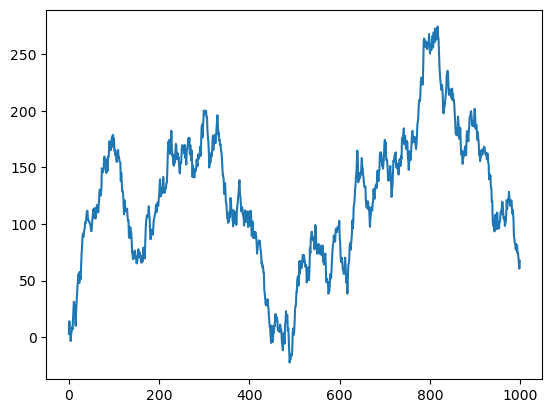

In [8]:
import numpy as np 
import pandas as pd
from dask import compute

np.random.seed(5)
rets = np.random.normal(0.05/252,0.1/np.sqrt(252), (1000,5))
columns = ['A','B','C','D','E']
rets = pd.DataFrame(rets,columns = columns)

dollarpos = np.random.normal(1000,100, (1000,5))
dollarpos = pd.DataFrame(dollarpos,columns = columns).abs()

profits = rets * dollarpos
profits["A"].cumsum().plot()


## Problem 2 - Performance Stats 
- "rets" variable below is a DataFrame containing randomly generated, hypothetical daily returns. Rows represent days and columns represent symbols.
- Please complete the function "compute_stats".
- compute_stats takes as input rets and returns a new DataFrame (stats) containing performance stats as specified below. rows of the result should be symbols and columns the performance stat label.
    1. "avg": average return (annualized)
    2. "vol": volatility (annualized)
    3. "sharpe": sharpe ratio (annualzied)
    4. "hit_rate": percent of returns which are positive
- Plot the sharpe ratios in "stats" in ascending order.

In [29]:
import numpy as np 
import pandas as pd 

np.random.seed(5)
rets = np.random.normal(0.05/252,0.1/np.sqrt(252), (1000,5))
columns = ['A','B','C','D','E']
rets = pd.DataFrame(rets,columns = columns)

,A,B,C,D,E
0,0.002978,-0.001886,0.015511,-0.001390,0.000889
1,0.010167,-0.005529,-0.003529,0.001380,-0.001880
2,-0.007315,-0.001092,-0.002062,0.004000,-0.010289
3,-0.004212,0.007451,0.011898,-0.009321,0.004261
4,-0.005979,-0.005199,-0.005294,-0.002463,0.006475
...,...,...,...,...,...
995,0.000698,0.000355,0.009889,-0.005684,-0.005408
996,-0.004135,-0.009947,0.002207,-0.001526,-0.011510
997,-0.005282,-0.001007,0.001393,-0.003495,0.011317
998,-0.004228,0.005018,-0.011916,0.009132,-0.006267


<Axes: >

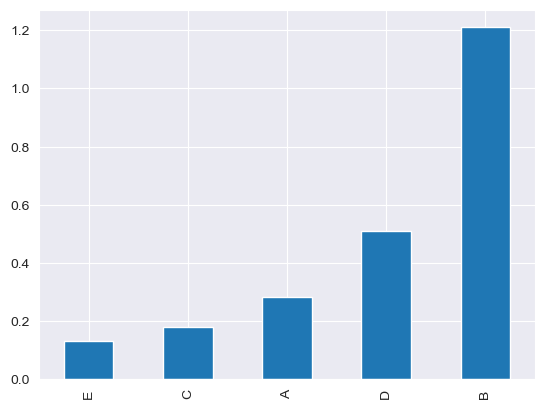

In [32]:
def compute_stats(rets):
    # fill out the body here
    stats = {} 
    stats['avg'] = rets.mean()*252
    stats['vol'] = rets.std()*np.sqrt(252)
    stats['sharpe'] = stats['avg']/stats['vol']
    stats['hit_rate'] = (rets>0).mean()
    stats = pd.DataFrame(stats)
    return stats 

stats = compute_stats(rets)

stats['sharpe'].sort_values().plot(kind='bar')

## Problem 3 - Simple Reversal Signal
- "rets" variable below is a DataFrame containing randomly generated, hypothetical daily returns. Rows represent days and columns represent symbols
- Please complete the function "reversal_signal"
- reversal_signal takes as input rets and returns a new DataFrame (signal) which has the same rows/columns as rets. The values of signal are 1 if the symbol had the worst return that day, -1 if it had the best return, and 0 otherwise. 
- plot the value of signal through time for "A"

Hint: Try to construct a boolean DataFrame first and then convert it to an integer DataFrame

In [ ]:
import numpy as np 
import pandas as pd 

np.random.seed(5)
rets = np.random.normal(0.05/252,0.1/np.sqrt(252), (1000,5))
columns = ['A','B','C','D','E']
rets = pd.DataFrame(rets,columns = columns)

In [36]:
def reversal_signal(rets):
    # fill out the body here
    # return a DataFrame "signal"
    # signal has same index/columns as rets
    # the value in signal is  1 if the symbol had the worst return on
    # a particular day, -1 if it had the best, and 0 otherwise
    ranked = rets.rank(1, method = 'first')
    
    is_max = (ranked == rets.shape[1]) * 1
    is_min = (ranked == 1) * 1
    
    signal = is_min - is_max
    
    return signal

In [37]:
signal = reversal_signal(rets)

<Axes: >

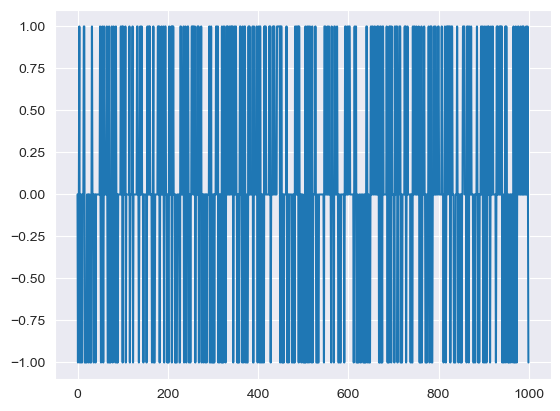

In [38]:
signal["A"].plot()